In [89]:
from math import isnan
import pandas as pd, numpy as np, matplotlib.pyplot as plt

df = pd.read_csv("train.csv").dropna(subset=["Age"])

In [110]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder().fit(df.Sex)
df["Sex_"] = le.transform(df.Sex)


df["CabinGroup"] = [s[0] if type(s)==str else "" for s in df.Cabin]
df["HasCabin"] = [1 if type(s)==str else 0 for s in df.Cabin]
df["Pclass_"] = df["Pclass"]-2


from sklearn.preprocessing import RobustScaler

df["Age_"] = RobustScaler().fit_transform(df["Age"].values.reshape(-1, 1))

In [ ]:
fdf

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
Sex_           714 non-null int64
CabinGroup     714 non-null object
dtypes: float64(2), int64(6), object(6)
memory usage: 83.7+ KB


In [111]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_,HasCabin,Pclass_,Age_
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.634454,0.259104,0.236695,0.095056
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930,0.481921,0.438450,0.838250,0.812671
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.542937
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000,0.000000,0.000000,-1.000000,-0.440559
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,1.000000,0.000000,0.000000,0.000000
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000,1.000000,1.000000,1.000000,0.559441
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000,2.909091


In [93]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_,CabinGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,G


In [98]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_,HasCabin
PassengerId,1.000000,0.029340,-0.035349,0.036847,-0.082398,-0.011617,0.009592,0.024575,0.015261
Survived,0.029340,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189,-0.538826,0.324530
Pclass,-0.035349,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182,0.155460,-0.739512
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,0.249732
SibSp,-0.082398,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329,-0.103950,-0.033826
Parch,-0.011617,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119,-0.246972,0.026977
Fare,0.009592,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000,-0.184994,0.492069
Sex_,0.024575,-0.538826,0.155460,0.093254,-0.103950,-0.246972,-0.184994,1.000000,-0.148511
HasCabin,0.015261,0.324530,-0.739512,0.249732,-0.033826,0.026977,0.492069,-0.148511,1.000000


In [97]:
df.groupby("HasCabin").Survived.mean()

HasCabin
0    0.311909
1    0.675676
Name: Survived, dtype: float64

In [95]:
df.CabinGroup.value_counts()

     529
C     51
B     45
D     31
E     30
A     12
F     11
G      4
T      1
Name: CabinGroup, dtype: int64

In [64]:
df.groupby("Parch").Survived.mean()

Parch
0    0.357006
1    0.554545
2    0.573529
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [65]:
df.Parch.value_counts()

0    521
1    110
2     68
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [66]:
df.groupby("Pclass").Survived.mean()

Pclass
1    0.655914
2    0.479769
3    0.239437
Name: Survived, dtype: float64

In [67]:
df.groupby("Sex").Survived.mean()

Sex
female    0.754789
male      0.205298
Name: Survived, dtype: float64

In [68]:
df.groupby("Embarked").Survived.mean()

Embarked
C    0.607692
Q    0.285714
S    0.362816
Name: Survived, dtype: float64

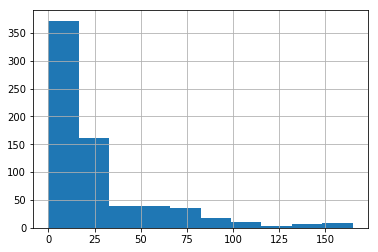

In [69]:
df.query("Fare<200").Fare.hist()

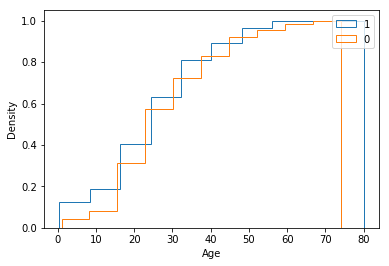

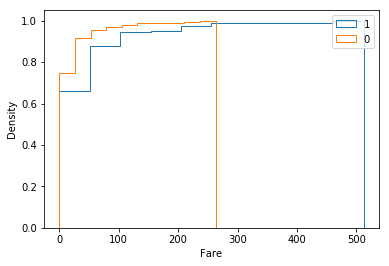

In [70]:
for f in ["Age", "Fare"]:
    plt.figure()
    plt.hist(df.query("Survived==1")[f], label="1", histtype='step', density=True, cumulative=True)
    plt.hist(df.query("Survived==0")[f], label="0", histtype='step', density=True, cumulative=True)
    plt.legend()
    plt.xlabel(f); plt.ylabel("Density")
    plt.show()

# Fit a logistic regression

In [123]:
import statsmodels.api as sm

X = df[[
    "Pclass_", 
    "Sex_", 
#     "Age_"
]].values
y = df.Survived

X_ = sm.add_constant(X)
lr = sm.Logit(y, X_)
lr_res = lr.fit()

print(lr_res.summary())

Optimization terminated successfully.
         Current function value: 0.470946
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      711
Method:                           MLE   Df Model:                            2
Date:                Sun, 06 Dec 2020   Pseudo R-squ.:                  0.3027
Time:                        11:11:34   Log-Likelihood:                -336.26
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 3.907e-64
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3647      0.160      8.554      0.000       1.052       1.677
x1            -0.9910      0.

[0.81115619 0.83965517 0.83590264 0.84117647 0.83682266]


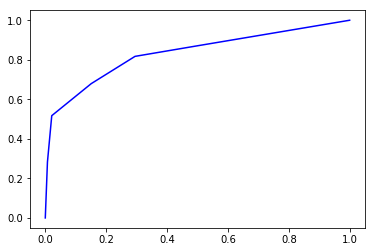

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


lr = LogisticRegression().fit(X, y)
print(cross_val_score(lr, X, y, scoring="roc_auc_ovr"))

from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y, lr.predict_proba(X)[:,1])
plt.plot(fpr, tpr, 'b-')

[0.81237323 0.86176471 0.84148073 0.84858012 0.87110016]


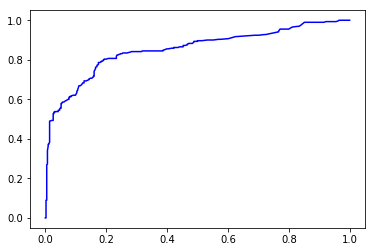

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


lr = LogisticRegression().fit(X, y)
print(cross_val_score(lr, X, y, scoring="roc_auc_ovr"))

from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y, lr.predict_proba(X)[:,1])
plt.plot(fpr, tpr, 'b-')

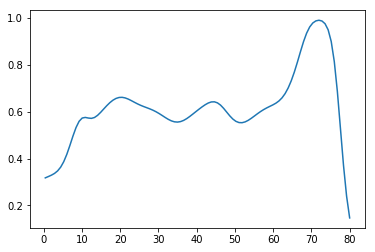

In [140]:
from ml_toolkit.eda import smooth1D

x, y = smooth1D(df.Age, 1-df.Survived, sigma=3)
plt.plot(x,y)

In [126]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
18     31.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
27     19.0
30     40.0
33     66.0
34     28.0
35     42.0
37     21.0
38     18.0
       ... 
856    45.0
857    51.0
858    24.0
860    41.0
861    21.0
862    48.0
864    24.0
865    42.0
866    27.0
867    31.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64